Testing the the use of computer vision to assist in creating metadata for the Tennessee Farm News

In [1]:
%matplotlib inline
import random
from pathlib import Path

import cv2
import numpy as np
import pandas as pd
from ipywidgets import IntProgress, Label, VBox
from IPython.display import display
from matplotlib import pyplot as plt
from PIL import Image
from skimage.measure import compare_ssim as ssim

import img_qc.img_qc as img_qc

In [2]:
def get_top_percent_of_image(image, percentage):
    width, height = image.size
    box = (0, 0, width, int(height * percentage))  # percentage as float
    image_cropped = image.crop(box)
    return image_cropped

def if_rgb_convert_to_gray(np_image):
    if len(np_image.shape) > 2:
        np_image = cv2.cvtColor(np_image, cv2.COLOR_RGB2GRAY)
        
    return np_image

In [9]:
data_dir_path = Path('/Volumes/fluffy/ProjectCeres/00_for_CRL/agrtfn')

page_1_paths_list = sorted(data_dir_path.glob('**/*_0001.tif'))
# remove macOS '.' index files
page_1_paths_list = [x for x in page_1_paths_list if not str(x.stem).startswith('.')]
len(page_1_paths_list)

3451

This is processing all issues in {data_dir_path} from the Tennessee Farm News

In [11]:
number_of_grayscale = 0
number_of_rgb = 0
gray_image_paths_list = []
rgb_image_paths_list = []
for image_path in page_1_paths_list:
    image = Image.open(image_path)
    if image.mode == 'L':
        number_of_grayscale += 1
        gray_image_paths_list.append(image_path)
    elif image.mode == 'RGB':
        number_of_rgb += 1
        rgb_image_paths_list.append(image_path)
print(f'# of grayscale: {number_of_grayscale}')
print(f'      # of rgb: {number_of_rgb}')
print(f'  total images: {number_of_grayscale + number_of_rgb}')

# of grayscale: 2648
      # of rgb: 803
  total images: 3451


In [ ]:
# let's look at the top 1/3 of the image of all the rgb images since there aren't that many
for image_path in rgb_image_paths_list:
    image = Image.open(image_path)
    width, height = image.size
    box = (0, 0, width, int(height/3))  # (left, upper, right, lower)
    image_cropped = image.crop(box)
    plt.imshow(image_cropped)
    plt.title(image_path.stem)
    plt.show()

it looks like the following titles have a page 1 in color:
* Agricultural & home economics news
* Agricultural and home economics packet
* Agricultural news

Furthermore, the amount of each color on the page is very different in each title, so an average image color may be enough to identify each title. The PROBLEM, and it's a pain, is that there are 2 versions of the Agricultural & Home Economic News, which means I need 2 versions of that one to process.

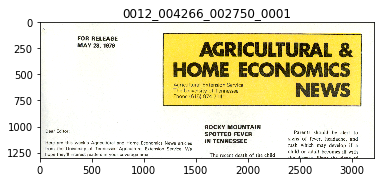

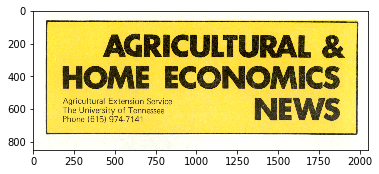

In [12]:
# get sample image from Agricultural & home economic news
ag_home_ec_news_yellow_path = [x for x in rgb_image_paths_list if x.stem.endswith('002750_0001')][0]
ag_home_ec_news_yellow = Image.open(ag_home_ec_news_yellow_path)
ag_home_ec_news_yellow = get_top_percent_of_image(ag_home_ec_news_yellow, 0.3)
plt.imshow(ag_home_ec_news_yellow)
plt.title(ag_home_ec_news_yellow_path.stem)
plt.show()

box = (1100, 50, 3150, 900)  # (left, upper, right, lower)
ag_home_ec_news_yellow_title_crop = ag_home_ec_news_yellow.crop(box)
plt.imshow(ag_home_ec_news_yellow_title_crop)
plt.show()

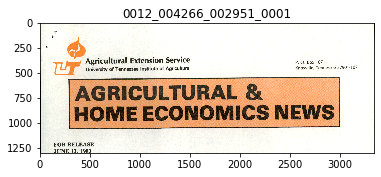

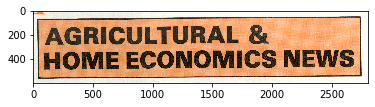

In [13]:
# get sample image from Agricultural & home economic news
ag_home_ec_news_orange_path = [x for x in rgb_image_paths_list if x.stem.endswith('002951_0001')][0]
ag_home_ec_news_orange = Image.open(ag_home_ec_news_orange_path)
ag_home_ec_news_orange = get_top_percent_of_image(ag_home_ec_news_orange, 0.3)
plt.imshow(ag_home_ec_news_orange)
plt.title(ag_home_ec_news_orange_path.stem)
plt.show()

box = (250, 500, 3050, 1100)  # (left, upper, right, lower)
ag_home_ec_news_orange_title_crop = ag_home_ec_news_orange.crop(box)
plt.imshow(ag_home_ec_news_orange_title_crop)
plt.show()

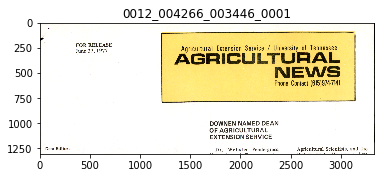

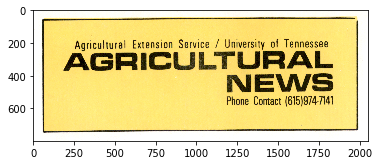

In [14]:
# get sample image from Agricultural news
ag_news_path = [x for x in rgb_image_paths_list if x.stem.endswith('003446_0001')][0]
ag_news = Image.open(ag_news_path)
ag_news = get_top_percent_of_image(ag_news, 0.3)
plt.imshow(ag_news)
plt.title(ag_news_path.stem)
plt.show()

box = (1150, 50, 3200, 850)  # (left, upper, right, lower)
ag_news_title_crop = ag_news.crop(box)
plt.imshow(ag_news_title_crop)
plt.show()

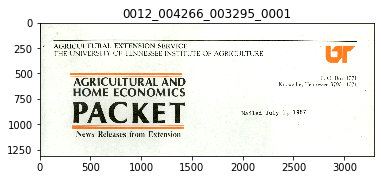

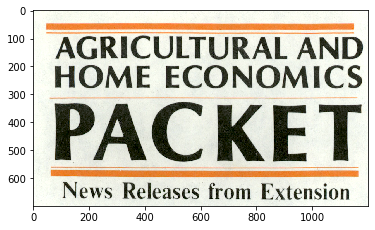

In [15]:
# get sample image from Agricultural and home economic packet
ag_home_ec_packet_path = [x for x in rgb_image_paths_list if x.stem.endswith('003295_0001')][0]
ag_home_ec_packet = Image.open(ag_home_ec_packet_path)
ag_home_ec_packet = get_top_percent_of_image(ag_home_ec_packet, 0.3)
plt.imshow(ag_home_ec_packet)
plt.title(ag_home_ec_packet_path.stem)
plt.show()

box = (250, 450, 1450, 1150)  # (left, upper, right, lower)
ag_home_ec_packet_title_crop = ag_home_ec_packet.crop(box)
plt.imshow(ag_home_ec_packet_title_crop)
plt.show()

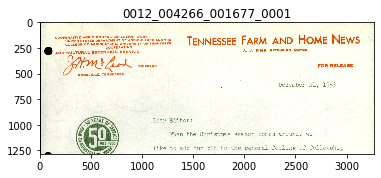

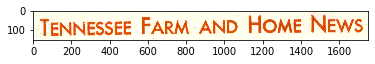

In [16]:
# get sample image from Tennesse farm and home news
tn_farm_home_news_path = [x for x in rgb_image_paths_list if x.stem.endswith('001677_0001')][0]
tn_farm_home_news = Image.open(tn_farm_home_news_path)
tn_farm_home_news = get_top_percent_of_image(tn_farm_home_news, 0.3)
plt.imshow(tn_farm_home_news)
plt.title(tn_farm_home_news_path.stem)
plt.show()

box = (1400, 100, 3150, 250)  # (left, upper, right, lower)
tn_farm_home_news_title_crop = tn_farm_home_news.crop(box)
plt.imshow(tn_farm_home_news_title_crop)
plt.show()

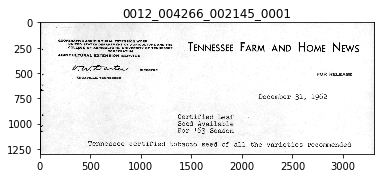

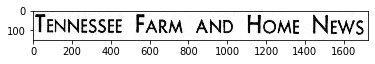

In [17]:
# get sample image from Tennesse farm and home news
tn_farm_home_news_gray_path = [x for x in page_1_paths_list if x.stem.endswith('002145_0001')][0]
tn_farm_home_news_gray = Image.open(tn_farm_home_news_gray_path)
tn_farm_home_news_gray = get_top_percent_of_image(tn_farm_home_news_gray, 0.3)
plt.imshow(tn_farm_home_news_gray, cmap='gray')
plt.title(tn_farm_home_news_gray_path.stem)
plt.show()

box = (1450, 175, 3175, 325)  # (left, upper, right, lower)
tn_farm_home_news_gray_title_crop = tn_farm_home_news_gray.crop(box)
plt.imshow(tn_farm_home_news_gray_title_crop, cmap='gray')
plt.show()


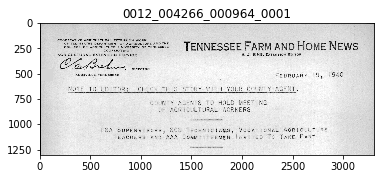

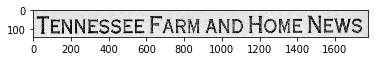

In [18]:
# get sample image from Tennesse farm and home news
tn_farm_home_news_gray_early_path = [x for x in page_1_paths_list if x.stem.endswith('000964_0001')][0]
tn_farm_home_news_gray_early = Image.open(tn_farm_home_news_gray_early_path)
tn_farm_home_news_gray_early = get_top_percent_of_image(tn_farm_home_news_gray_early, 0.3)
plt.imshow(tn_farm_home_news_gray_early, cmap='gray')
plt.title(tn_farm_home_news_gray_early_path.stem)
plt.show()

box = (1400, 150, 3175, 290)  # (left, upper, right, lower)
tn_farm_home_news_gray_early_title_crop = tn_farm_home_news_gray_early.crop(box)
plt.imshow(tn_farm_home_news_gray_early_title_crop, cmap='gray')
plt.show()

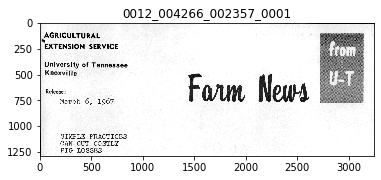

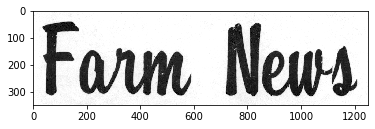

In [19]:
# get sample image from Farm news
farm_news_path = [x for x in page_1_paths_list if x.stem.endswith('002357_0001')][0]
farm_news = Image.open(farm_news_path)
farm_news = get_top_percent_of_image(farm_news, 0.3)
plt.imshow(farm_news, cmap='gray')
plt.title(farm_news_path.stem)
plt.show()

box = (1400, 450, 2650, 800)  # (left, upper, right, lower)
farm_news_title_crop = farm_news.crop(box)
plt.imshow(farm_news_title_crop, cmap='gray')
plt.show()

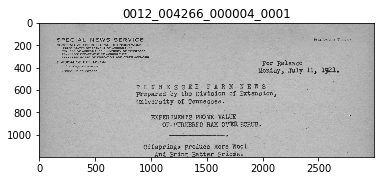

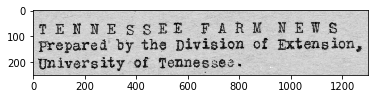

In [20]:
# get sample image from Tennesse farm news
tn_farm_news_path = [x for x in page_1_paths_list if x.stem.endswith('000004_0001')][0]
tn_farm_news = Image.open(tn_farm_news_path)
tn_farm_news = get_top_percent_of_image(tn_farm_news, 0.3)
plt.imshow(tn_farm_news, cmap='gray')
plt.title(tn_farm_news_path.stem)
plt.show()

box = (850, 500, 2150, 750)  # (left, upper, right, lower)
tn_farm_news_title_crop = tn_farm_news.crop(box)
plt.imshow(tn_farm_news_title_crop, cmap='gray')
plt.show()

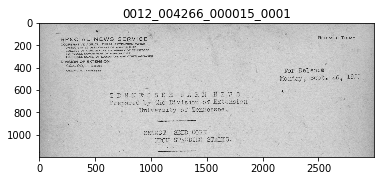

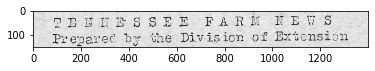

In [21]:
# get sample image from Tennesse farm news
tn_farm_news2_path = [x for x in page_1_paths_list if x.stem.endswith('000015_0001')][0]
tn_farm_news2 = Image.open(tn_farm_news2_path)
tn_farm_news2 = get_top_percent_of_image(tn_farm_news2, 0.3)
plt.imshow(tn_farm_news2, cmap='gray')
plt.title(tn_farm_news2_path.stem)
plt.show()

box = (550, 600, 1950, 750)  # (left, upper, right, lower)
tn_farm_news2_title_crop = tn_farm_news2.crop(box)
plt.imshow(tn_farm_news2_title_crop, cmap='gray')
plt.show()

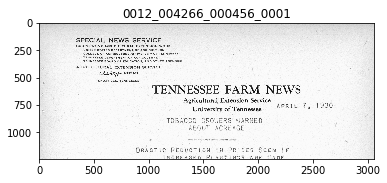

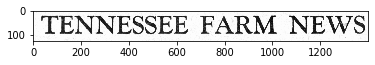

In [22]:
# get sample image from Tennesse farm news
tn_farm_news3_path = [x for x in page_1_paths_list if x.stem.endswith('000456_0001')][0]
tn_farm_news3 = Image.open(tn_farm_news3_path)
tn_farm_news3 = get_top_percent_of_image(tn_farm_news3, 0.3)
plt.imshow(tn_farm_news3, cmap='gray')
plt.title(tn_farm_news3_path.stem)
plt.show()

box = (1000, 550, 2400, 675)  # (left, upper, right, lower)
tn_farm_news3_title_crop = tn_farm_news3.crop(box)
plt.imshow(tn_farm_news3_title_crop, cmap='gray')
plt.show()

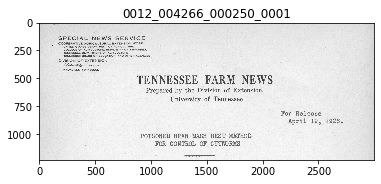

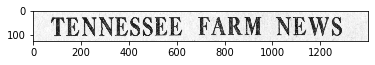

In [23]:
# get sample image from Tennesse farm news
tn_farm_news4_path = [x for x in page_1_paths_list if x.stem.endswith('000250_0001')][0]
tn_farm_news4 = Image.open(tn_farm_news4_path)
tn_farm_news4 = get_top_percent_of_image(tn_farm_news4, 0.3)
plt.imshow(tn_farm_news4, cmap='gray')
plt.title(tn_farm_news4_path.stem)
plt.show()

box = (800, 450, 2200, 575)  # (left, upper, right, lower)
tn_farm_news4_title_crop = tn_farm_news4.crop(box)
plt.imshow(tn_farm_news4_title_crop, cmap='gray')
plt.show()

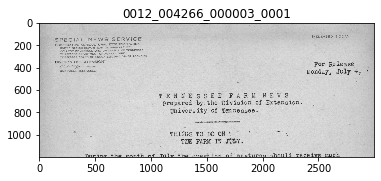

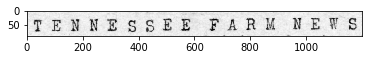

In [24]:
# get sample image from Tennesse farm news
tn_farm_news5_path = [x for x in page_1_paths_list if x.stem.endswith('000003_0001')][0]
tn_farm_news5 = Image.open(tn_farm_news5_path)
tn_farm_news5 = get_top_percent_of_image(tn_farm_news5, 0.3)
plt.imshow(tn_farm_news5, cmap='gray')
plt.title(tn_farm_news5_path.stem)
plt.show()

box = (1050, 600, 2250, 690)  # (left, upper, right, lower)
tn_farm_news5_title_crop = tn_farm_news5.crop(box)
plt.imshow(tn_farm_news5_title_crop, cmap='gray')
plt.show()

In [ ]:
# try to match cropped title to scanned page
MIN_MATCH_COUNT = 4

image_search_for = np.array(ag_home_ec_packet_title_crop)
image_look_in = np.array(ag_home_ec_packet)

# grayscale images
image_search_for_gray = cv2.cvtColor(image_search_for, cv2.COLOR_RGB2GRAY)
image_look_in_gray = cv2.cvtColor(image_look_in, cv2.COLOR_RGB2GRAY)

## (2) Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

## (3) Create flann matcher
matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})

## (4) Detect keypoints and compute keypointer descriptors
kpts1, descs1 = sift.detectAndCompute(image_search_for_gray,None)
kpts2, descs2 = sift.detectAndCompute(image_look_in_gray,None)

## (5) knnMatch to get Top2
matches = matcher.knnMatch(descs1, descs2, 2)
# Sort by their distance.
matches = sorted(matches, key = lambda x:x[0].distance)

## (6) Ratio test, to get good matches.
good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]

canvas = image_look_in.copy()

## (7) find homography matrix
if len(good)>MIN_MATCH_COUNT:
    ## (queryIndex for the small object, trainIndex for the scene )
    src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    ## find homography matrix in cv2.RANSAC using good match points
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    h,w = image_search_for.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))


## (8) drawMatches
matched = cv2.drawMatches(image_search_for,kpts1,canvas,kpts2,good,None)#,**draw_params)

## (9) Crop the matched region from scene
h,w = image_search_for.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
found = cv2.warpPerspective(image_look_in,perspectiveM,(w,h))

# display images
plt.imshow(matched)
plt.title('Matched')
plt.show()
plt.imshow(found)
plt.title('Found')
plt.show()

In [ ]:
# load 2nd Ag home ec packet image to try and find title in
ag_home_ec_packet_test_path = [x for x in rgb_image_paths_list if x.stem.endswith('003284_0001')][0]
ag_home_ec_packet_test = Image.open(ag_home_ec_packet_test_path)
ag_home_ec_packet_test = get_top_percent_of_image(ag_home_ec_packet_test, 0.3)
plt.imshow(ag_home_ec_packet_test)
plt.title(ag_home_ec_packet_test_path.stem)
plt.show()

In [ ]:
# try to match cropped title to a DIFFERENT scanned page!
MIN_MATCH_COUNT = 4

image_search_for = np.array(ag_home_ec_packet_title_crop)
image_look_in = np.array(ag_home_ec_packet_test)

# grayscale images
image_search_for_gray = cv2.cvtColor(image_search_for, cv2.COLOR_RGB2GRAY)
image_look_in_gray = cv2.cvtColor(image_look_in, cv2.COLOR_RGB2GRAY)

## (2) Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

## (3) Create flann matcher
matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})

## (4) Detect keypoints and compute keypointer descriptors
kpts1, descs1 = sift.detectAndCompute(image_search_for_gray,None)
kpts2, descs2 = sift.detectAndCompute(image_look_in_gray,None)

## (5) knnMatch to get Top2
matches = matcher.knnMatch(descs1, descs2, 2)
# Sort by their distance.
matches = sorted(matches, key = lambda x:x[0].distance)

## (6) Ratio test, to get good matches.
good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]

canvas = image_look_in.copy()

## (7) find homography matrix
if len(good)>MIN_MATCH_COUNT:
    ## (queryIndex for the small object, trainIndex for the scene )
    src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    ## find homography matrix in cv2.RANSAC using good match points
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    h,w = image_search_for.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))


## (8) drawMatches
matched = cv2.drawMatches(image_search_for,kpts1,canvas,kpts2,good,None)#,**draw_params)

## (9) Crop the matched region from scene
h,w = image_search_for.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
found = cv2.warpPerspective(image_look_in,perspectiveM,(w,h))

# display images
plt.imshow(matched)
plt.title('Matched')
plt.show()
plt.imshow(found)
plt.title('Found')
plt.show()

In [25]:
def old_find_crop(image_search_for, image_look_in, minimum_matches, distance_ratio):

    image_search_for = np.array(image_search_for)
    image_look_in = np.array(image_look_in)

    # convert to grayscale if necessary
    image_search_for_gray = if_rgb_convert_to_gray(image_search_for)
    image_look_in_gray = if_rgb_convert_to_gray(image_look_in)
    
    # equalize histogram of image we're looking in (already done for title crop)
    # image_look_in_gray = cv2.equalizeHist(image_look_in_gray)
    # image_search_for_gray = cv2.equalizeHist(image_search_for_gray)

    ## (2) Create SIFT object
    sift = cv2.xfeatures2d.SIFT_create()

    ## (3) Create flann matcher
    matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})

    ## (4) Detect keypoints and compute keypointer descriptors
    kpts1, descs1 = sift.detectAndCompute(image_search_for_gray,None)
    kpts2, descs2 = sift.detectAndCompute(image_look_in_gray,None)

    ## (5) knnMatch to get Top2
    matches = matcher.knnMatch(descs1, descs2, 2)
    # Sort by their distance.
    matches = sorted(matches, key = lambda x:x[0].distance)

    ## (6) Ratio test, to get good matches.
    # distance_ratio was originally 0.7
    good = [m1 for (m1, m2) in matches if m1.distance < distance_ratio * m2.distance]
    # print(f'                   matches: {len(good)}')

    canvas = image_look_in.copy()

    ## (7) find homography matrix
    if len(good)>minimum_matches:
        ## (queryIndex for the small object, trainIndex for the scene )
        src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        ## find homography matrix in cv2.RANSAC using good match points
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        if M is not None:
            h,w = image_search_for.shape[:2]
            pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
            dst = cv2.perspectiveTransform(pts,M)
            cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)

            ## (8) drawMatches
            matched = cv2.drawMatches(image_search_for,kpts1,canvas,kpts2,good,None)#,**draw_params)

            ## (9) Crop the matched region from scene
            h,w = image_search_for.shape[:2]
            pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
            dst = cv2.perspectiveTransform(pts,M)
            perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
            found = cv2.warpPerspective(image_look_in,perspectiveM,(w,h))

            # display images
            # fig, axes = plt.subplots(1, 2, figsize=(20, 10))
            # axes[0].imshow(matched)
            # axes[0].set_title(f'Matched: {len(good)}')
            # axes[1].imshow(found)
            # axes[1].set_title('Found')
            # plt.show()

            return len(good), matched, found
        
    
        # print('')
        # print(f'{25 * "*"}')
        # print( "Not enough matches are found - {}/{}".format(len(good),minimum_matches))
        # print(f'{25 * "*"}')
        # print('')
              
    return len(good), None, None  # return 0 for images if there weren't enough matches

In [66]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html
def find_crop(image_search_for, image_look_in, minimum_matches, distance_ratio):

    image_search_for = np.array(image_search_for)
    image_look_in = np.array(image_look_in)

    # convert to grayscale if necessary
    image_search_for_gray = if_rgb_convert_to_gray(image_search_for)
    image_look_in_gray = if_rgb_convert_to_gray(image_look_in)
    
    # equalize histogram of image we're looking in (already done for title crop)
    # image_look_in_gray = cv2.equalizeHist(image_look_in_gray)
    # image_search_for_gray = cv2.equalizeHist(image_search_for_gray)

    # create SIFT object
    sift = cv2.xfeatures2d.SIFT_create()
    
    # find keypoints and descriptors with SIFT
    keypoints_1, descriptors_1 = sift.detectAndCompute(image_search_for_gray, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(image_look_in_gray, None)
    
    FLANN_INDEX_KDTREE = 0
    index_parameters = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_parameters = dict(checks = 50)
    
    flann = cv2.FlannBasedMatcher(index_parameters, search_parameters)
    
    matches = flann.knnMatch(descriptors_1, descriptors_2, k=2)
    
    good_matches = []
    for m, n in matches:
        if m.distance < distance_ratio * n.distance:
            good_matches.append(m)
    number_of_good_matches = len(good_matches)
    # print(f'before: {number_of_good_matches}')
            
    if number_of_good_matches >= minimum_matches:
        source_points = np.float32([ keypoints_1[m.queryIdx].pt for m in good_matches ]).reshape(-1, 1, 2)
        destination_points = np.float32([ keypoints_2[m.trainIdx].pt for m in good_matches ]).reshape(-1, 1, 2)
        
        matrix, mask = cv2.findHomography(source_points, destination_points, cv2.RANSAC, 5.0)
        if matrix is not None:
            
            # matches_mask = mask.ravel().tolist()
            
            keypoints_2, descriptors_2 = sift.detectAndCompute(image_look_in_gray, mask)
            matches = flann.knnMatch(descriptors_1, descriptors_2, k=2)
            good_matches = []
            for m, n in matches:
                if m.distance < distance_ratio * n.distance:
                    good_matches.append(m)
            number_of_good_matches = len(good_matches)
            if number_of_good_matches <= minimum_matches:
                pass
            else:
                source_points = np.float32([ keypoints_1[m.queryIdx].pt for m in good_matches ]).reshape(-1, 1, 2)
                destination_points = np.float32([ keypoints_2[m.trainIdx].pt for m in good_matches ]).reshape(-1, 1, 2)
                matrix, mask = cv2.findHomography(source_points, destination_points, cv2.RANSAC, 5.0)
                matches_mask = mask.ravel().tolist()

                height, width = image_search_for_gray.shape
                points = np.float32([ [0,0], [0,height-1], [width-1,height-1], [width-1,0] ]).reshape(-1, 1, 2)
                print(number_of_good_matches)
                destination = cv2.perspectiveTransform(points, matrix)

                canvas = image_look_in.copy()
                canvas = cv2.polylines(canvas, [np.int32(destination)], True, (255, 0, 0), 10, cv2.LINE_AA)

                # draw matches
                draw_parameters = dict(
                    matchColor = (0, 255, 0),
                    singlePointColor = None,
                    matchesMask = matches_mask,  # only draw inliers
                    flags = 2  # don't draw single keypoints
                )

                matched_graphic = cv2.drawMatches(
                    image_search_for,
                    keypoints_1,
                    canvas,
                    keypoints_2,
                    good_matches,
                    None,
                    **draw_parameters
                )

                # crop found image
                perspective_matrix = cv2.getPerspectiveTransform(np.float32(destination), points)
                found_image = cv2.warpPerspective(image_look_in, perspective_matrix, (width, height))

                return number_of_good_matches, matched_graphic, found_image
        
    
        # print('')
        # print(f'{25 * "*"}')
        # print( "Not enough matches are found - {}/{}".format(len(good),minimum_matches))
        # print(f'{25 * "*"}')
        # print('')
              
    return number_of_good_matches, None, None  # return 0 for images if there weren't enough matches

In [70]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html
def find_crop(image_search_for, image_look_in, minimum_matches, distance_ratio):

    image_search_for = np.array(image_search_for)
    image_look_in = np.array(image_look_in)

    # convert to grayscale if necessary
    image_search_for_gray = if_rgb_convert_to_gray(image_search_for)
    image_look_in_gray = if_rgb_convert_to_gray(image_look_in)
    
    # equalize histogram of image we're looking in (already done for title crop)
    # image_look_in_gray = cv2.equalizeHist(image_look_in_gray)
    # image_search_for_gray = cv2.equalizeHist(image_search_for_gray)

    # create SIFT object
    sift = cv2.xfeatures2d.SIFT_create()
    
    # find keypoints and descriptors with SIFT
    keypoints_1, descriptors_1 = sift.detectAndCompute(image_search_for_gray, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(image_look_in_gray, None)
    
    FLANN_INDEX_KDTREE = 0
    index_parameters = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_parameters = dict(checks = 50)
    
    flann = cv2.FlannBasedMatcher(index_parameters, search_parameters)
    
    matches = flann.knnMatch(descriptors_1, descriptors_2, k=2)
    
    good_matches = []
    for m, n in matches:
        if m.distance < distance_ratio * n.distance:
            good_matches.append(m)
    number_of_good_matches = len(good_matches)
    # print(f'before: {number_of_good_matches}')
            
    if number_of_good_matches >= minimum_matches:
        source_points = np.float32([ keypoints_1[m.queryIdx].pt for m in good_matches ]).reshape(-1, 1, 2)
        destination_points = np.float32([ keypoints_2[m.trainIdx].pt for m in good_matches ]).reshape(-1, 1, 2)
        
        matrix, mask = cv2.findHomography(source_points, destination_points, cv2.RANSAC, 5.0)
        if matrix is not None:
            
            matches_mask = mask.ravel().tolist()

            height, width = image_search_for_gray.shape
            points = np.float32([ [0,0], [0,height-1], [width-1,height-1], [width-1,0] ]).reshape(-1, 1, 2)
            destination = cv2.perspectiveTransform(points, matrix)

            canvas = image_look_in.copy()
            canvas = cv2.polylines(canvas, [np.int32(destination)], True, (255, 0, 0), 10, cv2.LINE_AA)

            # draw matches
            draw_parameters = dict(
                matchColor = (0, 255, 0),
                singlePointColor = None,
                matchesMask = matches_mask,  # only draw inliers
                flags = 2  # don't draw single keypoints
            )

            matched_graphic = cv2.drawMatches(
                image_search_for,
                keypoints_1,
                canvas,
                keypoints_2,
                good_matches,
                None,
                **draw_parameters
            )

            # crop found image
            perspective_matrix = cv2.getPerspectiveTransform(np.float32(destination), points)
            found_image = cv2.warpPerspective(image_look_in, perspective_matrix, (width, height))

            return number_of_good_matches, matched_graphic, found_image
        
    
        # print('')
        # print(f'{25 * "*"}')
        # print( "Not enough matches are found - {}/{}".format(len(good),minimum_matches))
        # print(f'{25 * "*"}')
        # print('')
              
    return number_of_good_matches, None, None  # return 0 for images if there weren't enough matches

Processing Agricultural and home economics packet . . .
RGB


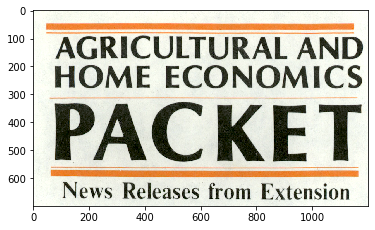

Processing Agricultural & home economics news_orange . . .
RGB


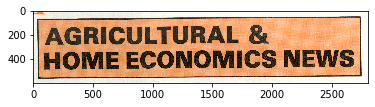

Processing Agricultural & home economics news_yellow . . .
RGB


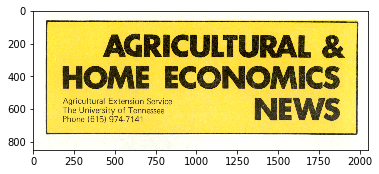

Processing Agricultural news . . .
RGB


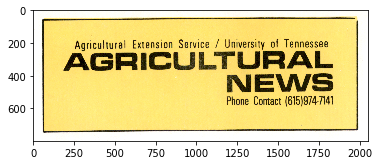

Processing Tennessee farm and home news . . .
RGB


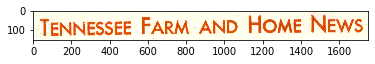

Processing Tennessee farm and home news_gray . . .
RGB


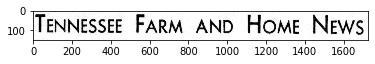

Processing Tennessee farm and home news_gray_early . . .
RGB


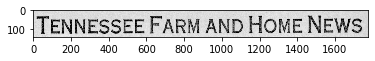

Processing Farm news . . .
RGB


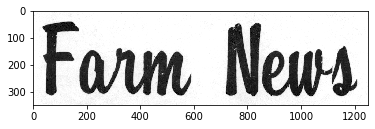

Processing Tennessee farm news . . .
RGB


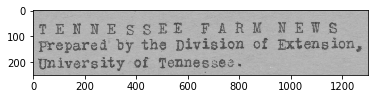

Processing Tennessee farm news2 . . .
RGB


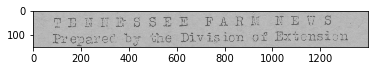

Processing Tennessee farm news3 . . .
RGB


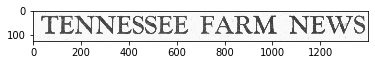

Processing Tennessee farm news4 . . .
RGB


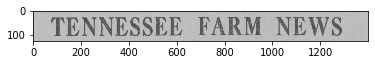

Processing Tennessee farm news5 . . .
RGB


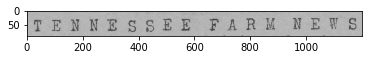


13 items in dictionary


In [27]:
# get title crops

# create dictionary of series titles and paths to a representative 1st page
images_for_title_crops_dict = {
    'Agricultural and home economics packet': ag_home_ec_packet_path,
    'Agricultural & home economics news_orange': ag_home_ec_news_orange_path,
    'Agricultural & home economics news_yellow': ag_home_ec_news_yellow_path,
    'Agricultural news': ag_news_path,
    'Tennessee farm and home news': tn_farm_home_news_path,
    'Tennessee farm and home news_gray': tn_farm_home_news_gray_path,
    'Tennessee farm and home news_gray_early': tn_farm_home_news_gray_early_path,
    'Farm news': farm_news_path,
    'Tennessee farm news': tn_farm_news_path,
    'Tennessee farm news2': tn_farm_news2_path,
    'Tennessee farm news3': tn_farm_news3_path,
    'Tennessee farm news4': tn_farm_news4_path,
    'Tennessee farm news5': tn_farm_news5_path,
}

# title crop boxes
crop_boxes_dict = {
    'Agricultural and home economics packet': (250, 450, 1450, 1150),
    'Agricultural & home economics news_orange': (250, 500, 3050, 1100),
    'Agricultural & home economics news_yellow': (1100, 50, 3150, 900),
    'Agricultural news': (1150, 50, 3200, 850),
    'Tennessee farm and home news': (1400, 100, 3150, 250),
    'Tennessee farm and home news_gray': (1450, 175, 3175, 325),
    'Tennessee farm and home news_gray_early': (1400, 150, 3175, 290),
    'Farm news': (1400, 450, 2650, 800),
    'Tennessee farm news': (850, 500, 2150, 750),
    'Tennessee farm news2': (550, 600, 1950, 750),
    'Tennessee farm news3': (1000, 550, 2400, 675),
    'Tennessee farm news4': (800, 450, 2200, 575),
    'Tennessee farm news5': (1050, 600, 2250, 690),
}

# instantiate dictionary for the images we're searching for, i.e. the titles
title_crops_dict = {}
bgr_title_crops_dict = {}
gray_title_crops_dict = {}

# loop through the dictionary titles
for title in images_for_title_crops_dict:
    
    # get the image path value out of the dictionary using the looped title variable as a key
    image_path = images_for_title_crops_dict[title]
    
    print(f'Processing {title} . . .')
    
    # convert to string and open as open numpy array with openCV
    image_for_title_crop = cv2.imread(str(image_path))  # cv2.imread requires string
    
    # load crop box using title; originally cropped with PIL so convert to numpy values
    x1, y1, x2, y2 = crop_boxes_dict[title]
    
    # crop image to title
    title_crop = image_for_title_crop[y1:y2, x1:x2].copy()  # copy for better memory use
    
    image = Image.fromarray(title_crop)
    print(image.mode)
    
    # add cropped image to dictionary
    title_crops_dict.update( {title: title_crop} )
    image = Image.open(image_path)
    if image.mode == 'L':  # then Grayscale
        gray_title_crops_dict.update( {title: title_crop})
        cmap = 'gray'
    else: # then BGR
        bgr_title_crops_dict.update( {title: title_crop})
        title_crop = cv2.cvtColor(title_crop, cv2.COLOR_BGR2RGB)
        cmap = None
        
    plt.imshow(title_crop, cmap=cmap)
    plt.show()
    
    
    
print('')
print(f'{len(title_crops_dict)} items in dictionary')

Begin: 0012_004266_000001_0001
        testing for: Tennessee farm and home news_gray
                   matches/minimum matches: 1/5
        testing for: Tennessee farm and home news_gray_early
                   matches/minimum matches: 3/5
        testing for: Farm news
                   matches/minimum matches: 1/5
        testing for: Tennessee farm news
6
                   matches/minimum matches: 6/5
                   ssim: 0.05544572456671048
        testing for: Tennessee farm news2
                   matches/minimum matches: 1/5
        testing for: Tennessee farm news3
                   matches/minimum matches: 3/5
        testing for: Tennessee farm news4
                   matches/minimum matches: 1/5
        testing for: Tennessee farm news5
                   matches/minimum matches: 1/5


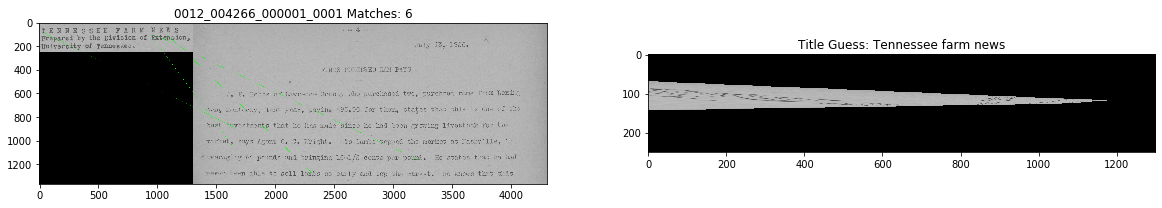


Begin: 0012_004266_000002_0001
        testing for: Tennessee farm and home news_gray
                   matches/minimum matches: 5/5
        testing for: Tennessee farm and home news_gray_early
                   matches/minimum matches: 7/5
        testing for: Farm news
                   matches/minimum matches: 9/5
        testing for: Tennessee farm news
49
                   matches/minimum matches: 49/5
                   ssim: 0.7325918011165586
        testing for: Tennessee farm news2
                   matches/minimum matches: 3/5
        testing for: Tennessee farm news3
                   matches/minimum matches: 1/5
        testing for: Tennessee farm news4
                   matches/minimum matches: 5/5
        testing for: Tennessee farm news5
8
                   matches/minimum matches: 8/5
                   ssim: 0.17572785955713793


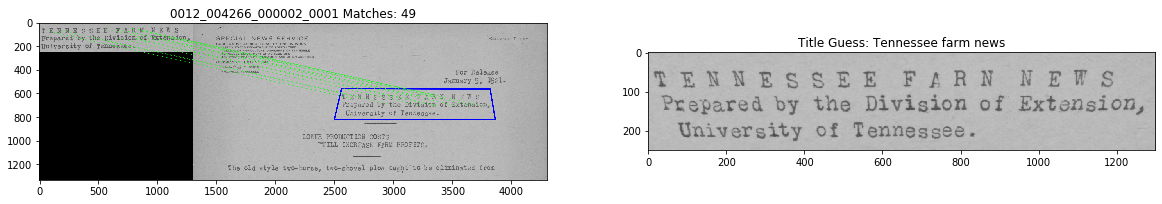


Begin: 0012_004266_000003_0001
        testing for: Tennessee farm and home news_gray
                   matches/minimum matches: 3/5
        testing for: Tennessee farm and home news_gray_early
                   matches/minimum matches: 7/5
        testing for: Farm news
16
                   matches/minimum matches: 16/5
                   ssim: 0.09821993974097443
        testing for: Tennessee farm news
38
                   matches/minimum matches: 38/5
                   ssim: 0.7027152404215913
        testing for: Tennessee farm news2
                   matches/minimum matches: 1/5
        testing for: Tennessee farm news3
8
                   matches/minimum matches: 8/5
                   ssim: 0.4687488026323542
        testing for: Tennessee farm news4
                   matches/minimum matches: 3/5
        testing for: Tennessee farm news5
496
                   matches/minimum matches: 496/5
                   ssim: 1.0


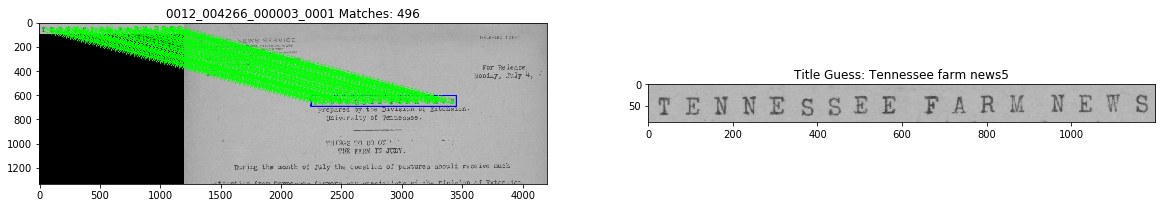


Begin: 0012_004266_000004_0001
        testing for: Tennessee farm and home news_gray
11
                   matches/minimum matches: 11/5
                   ssim: 0.4718604088109224
        testing for: Tennessee farm and home news_gray_early
7
                   matches/minimum matches: 7/5
                   ssim: 0.4000635525963047
        testing for: Farm news
                   matches/minimum matches: 0/5
        testing for: Tennessee farm news
1677
                   matches/minimum matches: 1677/5
                   ssim: 0.9999982957537378
        testing for: Tennessee farm news2
                   matches/minimum matches: 2/5
        testing for: Tennessee farm news3
                   matches/minimum matches: 2/5
        testing for: Tennessee farm news4
                   matches/minimum matches: 2/5
        testing for: Tennessee farm news5
12
                   matches/minimum matches: 12/5
                   ssim: 0.5951019646813255


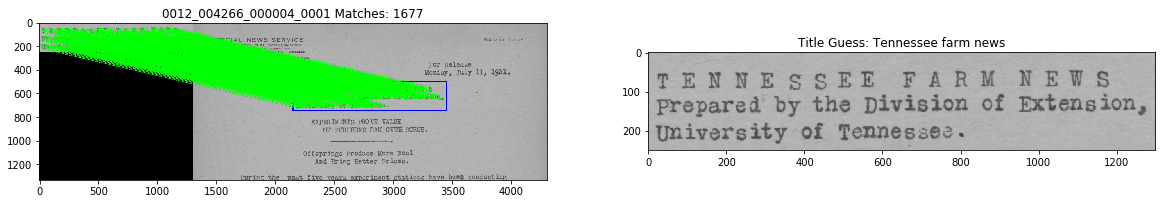


Begin: 0012_004266_000005_0001
        testing for: Tennessee farm and home news_gray
8
                   matches/minimum matches: 8/5
                   ssim: 0.25908021332026093
        testing for: Tennessee farm and home news_gray_early


KeyboardInterrupt: 

In [69]:
# identify titles!

gray_minimum_matches = 5
gray_distance_ratio = 0.6
bgr_minimum_matches = 40
bgr_distance_ratio = 0.55

image_paths_list = page_1_paths_list

# progress bar
progress_label = Label('Images to process')
progress_bar = IntProgress(min=0, max=len(image_paths_list))
progress_widget = VBox([progress_label, progress_bar])
display(progress_widget)

number_of_no_good_matches = 0
number_found_match = 0

for index, image_path in enumerate(image_paths_list, start=1):
    
    label = f'Processing {image_path.name} . . . \r    {index}/{len(image_paths_list)}'
    progress_label.value = label
    
    print(f'Begin: {image_path.stem}')
    
    # load image and crop to top 1/3
    image = cv2.imread(str(image_path))
    height, width = image.shape[:2]
    image_cropped = image[0:(int(height/3)), 0:width].copy() # [y1:y2, x1:x2]
    
    # set variables
    most_matches = 0
    best_matched_image = 0
    best_found_image = None
    best_title = None
    best_ssim_with_title = -1  # ssim varies from -1 to 1 (perfect match)
    best_match_value = 0
    
    # check if image is bgr or grayscale to get title dict to use
    with Image.open(image_path) as image:
        if image.mode == 'L':  # then Grayscale
            grayscale = True
            title_dict = gray_title_crops_dict
            minimum_matches = gray_minimum_matches
            distance_ratio = gray_distance_ratio
        else:
            grayscale = False
            title_dict = bgr_title_crops_dict
            minimum_matches = bgr_minimum_matches
            distance_ratio = bgr_distance_ratio
    
    for title in title_dict:
        title_crop = title_dict[title]
        
        print(f'        testing for: {title}')
        number_of_matches, matched_image, found_image = find_crop(title_crop, image_cropped, minimum_matches, distance_ratio)
        print(f'                   matches/minimum matches: {number_of_matches}/{minimum_matches}')
        ""
        if number_of_matches > minimum_matches:
            if found_image is not None:
                # get the structural similarity index of the match with the image for a 2nd heuristic    
                np_found = cv2.cvtColor(found_image, cv2.COLOR_BGR2GRAY)
                np_title_crop = cv2.cvtColor(np.array(title_crop), cv2.COLOR_BGR2GRAY)
                # print(f'np_found: {np_found.shape}')
                # print(f'np_title_crop: {np_title_crop.shape}')
                try:
                    ssim_with_title = ssim(np_title_crop, np_found, multichannel=True)
                    print(f'                   ssim: {ssim_with_title}')
                    if ssim_with_title > best_ssim_with_title:
                        best_ssim_with_title = ssim_with_title
                        most_matches = number_of_matches
                        best_matched_image = matched_image
                        best_found_image = found_image
                        best_title = title

                except ValueError:  # image shape doesn't match, so most likely incorrect title
                    continue

                if best_title == 'Agricultural & home economics news_orange' or best_title == 'Agricultural & home economics news_yellow':
                    best_title = 'Agricultural & home economics news'
                elif best_title == 'Tennessee farm and home news_gray' or best_title == 'Tennessee farm and home news_gray_early':
                    best_title = 'Tennessee farm and home news'

    if isinstance(best_matched_image, int):
        print('')
        print('     ***** No good match found *****')
        print('')
        number_of_no_good_matches += 1
        
    else:
        # convert to RGB channel order and show crop
        if len(best_matched_image.shape) > 2:
            best_matched_image = cv2.cvtColor(best_matched_image, cv2.COLOR_BGR2RGB)
            best_found_image = cv2.cvtColor(best_found_image, cv2.COLOR_BGR2RGB)
            cmap = None
        else:
            cmap = 'gray'
        # display images
        fig, axes = plt.subplots(1, 2, figsize=(20, 10))
        axes[0].imshow(best_matched_image, cmap=cmap)
        axes[0].set_title(f'{image_path.stem} Matches: {most_matches}')
        axes[1].imshow(best_found_image, cmap=cmap)
        axes[1].set_title(f'Title Guess: {best_title}')
        plt.show()
        
        number_found_match += 1
        
    progress_bar.value = index
    
    print('')